<h1>Задачи</h1>
<p>1 - Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.
</p>
<p>2 - Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. 
</p>
<p>3 - Подумайте, как можно улучшить график.
</p>
<p>4 - Сколько транзакций завершились ошибкой?
</p>
<p>5 - Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.
</p>
<p>6 - Коллега прислал Вам обновленные данные. Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.
</p>

<p><b>Описание данных</b></p>
<p>date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)
</p>
<p>name – имя пользователя
</p>
<p>transaction – статус транзакции
</p>
<p>minute* – сколько минут прошло с начала дня
</p>


<h2>1 - Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('transaction_data.csv')

In [3]:
df.shape

(5315, 3)

In [4]:
df.dtypes

date           object
name           object
transaction    object
dtype: object

In [18]:
df.isnull().count()

date           5315
name           5315
transaction    5315
dtype: int64

In [19]:
df.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


<h2>2 - Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.</h2>

In [21]:
df['transaction']

0         cancelled
1       successfull
2       successfull
3         cancelled
4         cancelled
           ...     
5310    successfull
5311    successfull
5312    successfull
5313    successfull
5314      cancelled
Name: transaction, Length: 5315, dtype: object

In [33]:
transaction_count = df.groupby('transaction', as_index=False).agg({'date':'count'})
transaction_count

,transaction,date
0,cancelled,1619
1,error,4
2,successfull,3692


<BarContainer object of 3 artists>

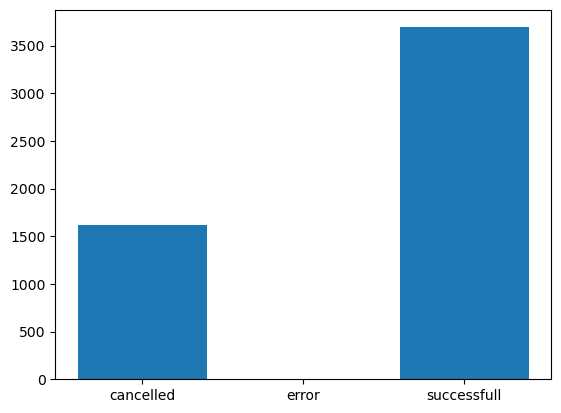

In [32]:
plt.bar(transaction_count['transaction'], height=transaction_count['date'])
# Барплот с помощью matplotlib

<Axes: xlabel='transaction', ylabel='date'>

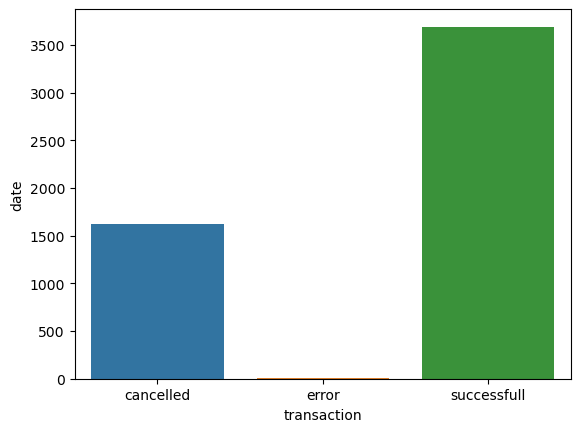

In [36]:
sns.barplot(data=transaction_count,x=transaction_count['transaction'],y=transaction_count['date'])
# Барплот с помощью seaborn

<h2>3 - Подумайте, как можно улучшить график.</h2>

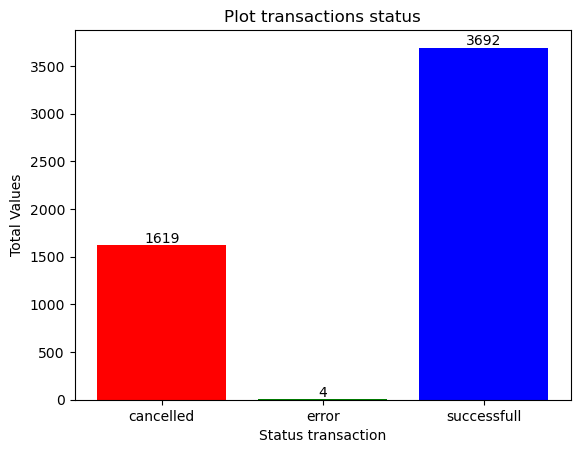

In [46]:
# На изначальном графике у нас не обозначены оси и не назван график плюс ко всему не было видно значения некоторых переменных
# Мы это исправим, ниже представлен код-решение через matplotlib
plt.bar(transaction_count['transaction'], height=transaction_count['date'], color=['r','g','b'])
x_labels_values = transaction_count['date'].to_list()
x_labels_name = transaction_count['transaction'].to_list()
plt.xlabel('Status transaction')
plt.ylabel('Total Values')
plt.title('Plot transactions status')
for i in range(len(x_labels_name)):
    plt.text(i,x_labels_values[i],x_labels_values[i],ha='center',va='bottom')

In [50]:
# А теперь через seaborn провернем тоже самое
# Как видим график стал читабельнее

Text(0.5, 1.0, 'Plot transactions status')

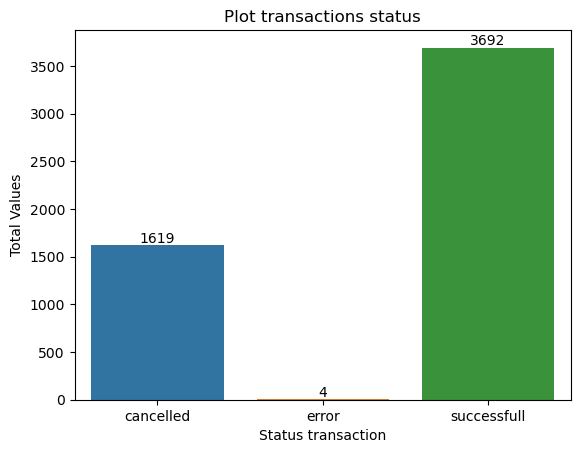

In [51]:
ax = sns.barplot(data=transaction_count,x=transaction_count['transaction'],y=transaction_count['date'], estimator="sum", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_xlabel('Status transaction')
ax.set_ylabel('Total Values')
ax.set_title('Plot transactions status')

<h2>4 - Сколько транзакций завершились ошибкой?</h2>

In [53]:
len(df[df['transaction'] == 'cancelled'])

1619

<h2>5 - Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.</h2>

In [57]:
successfull_transaction = df.query('transaction == "successfull"').groupby('name', as_index=False).agg({'transaction':'count'})

In [59]:
successfull_transaction.head()

,name,transaction
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68


C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


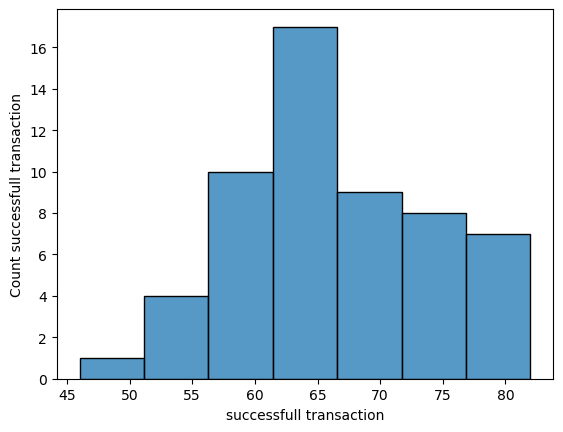

In [61]:
ax = sns.histplot(successfull_transaction, x=successfull_transaction['transaction'])
ax.set_xlabel('successfull transaction')
ax.set_ylabel('Count successfull transaction')
ax.set_label('Histogram successfull transaction')

<h2>6 - Коллега прислал Вам обновленные данные. Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.</h2>

In [76]:
# Данное решение относится к не обновленным данным транзакций, для правильного решения нам следует использовать новый переданный файл
# user_vs_minute_pivot = df.groupby(['date','name'], as_index=False) \
#                         .agg({'transaction':'sum'}) \
#                         .pivot(columns='name',index='date',values='transaction') \
#                         .fillna(0)

In [95]:
# Для решения данной задачи я перевел дату в минуты
updated_df = pd.read_csv('transaction_data_updated.csv')
updated_df['date_minute'] = pd.to_datetime(updated_df['date'], errors='coerce').dt.minute
updated_df = updated_df.drop('date_minute', axis=1)

In [97]:
user_vs_minute_pivot = updated_df.groupby(['minute','name'], as_index=False) \
                        .agg({'transaction':'count'}) \
                        .pivot(columns='name',index='minute',values='transaction') \
                        .fillna(0)

In [99]:
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
